# Introduction
This project and code deals with the mushrooms.csv dataset sourced from the Kaggle Dataset Library. The dataset can be found here: https://www.kaggle.com/datasets/uciml/mushroom-classification

The main goal of this project is to create a classification model to identify the class labels for the output variable: "class", which aims at differentiation of the mushrooms to edible and poisonous classes.

Data dictionary of the file is located in the UCI Machine Learning Repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom

Any questions about the code can be directed to me at mpalakur@csu.edu

# Installing necessary libraries

In [ ]:
!pip install sklearn
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=081a524dd1990e842abf651396edd82f5df28ab22c7d8900291da1c64c1a3754
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exploratory Data Analysis

**Importing Data**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/mushrooms.csv")


**Preliminary Data Exploration**

In [ ]:
print(df.shape)

(8124, 23)


The dataset has **8124 rows and 23 columns**. Out of the 23 columns, we have *one* target or dependent variable i.e. **class**, and *22* independent variables

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
print(df.nunique(axis=0))

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


**Dropping veil-type** from columns since it has only one unique value, and dropping the target variable from selected columns for building the classification model

In [ ]:
dropped_cols = ['veil-type', 'class']
selected_cols = df.columns.values.tolist()
# selected_cols = selected_cols.remove('veil-type') #.remove not working as expected. Returning None Type on execution?
selected_cols = [element for element in selected_cols if (element != 'veil-type' and element!='class')] #Removing veil-type
print(selected_cols)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [ ]:
i=0
print("Unique Values for each column:")
for column in selected_cols:
  col_name = selected_cols[i]
  print(str(col_name) + ": "+str(df.explode(col_name)[col_name].unique().tolist()))
  i+=1

Unique Values for each column:
cap-shape: ['x', 'b', 's', 'f', 'k', 'c']
cap-surface: ['s', 'y', 'f', 'g']
cap-color: ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r']
bruises: ['t', 'f']
odor: ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
gill-attachment: ['f', 'a']
gill-spacing: ['c', 'w']
gill-size: ['n', 'b']
gill-color: ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o']
stalk-shape: ['e', 't']
stalk-root: ['e', 'c', 'b', 'r', '?']
stalk-surface-above-ring: ['s', 'f', 'k', 'y']
stalk-surface-below-ring: ['s', 'f', 'y', 'k']
stalk-color-above-ring: ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y']
stalk-color-below-ring: ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']
veil-color: ['w', 'n', 'o', 'y']
ring-number: ['o', 't', 'n']
ring-type: ['p', 'e', 'l', 'f', 'n']
spore-print-color: ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b']
population: ['s', 'n', 'a', 'v', 'y', 'c']
habitat: ['u', 'g', 'm', 'd', 'p', 'w', 'l']


**Examining the distribution of unique values of each column to get a better visibility into the dataset:**

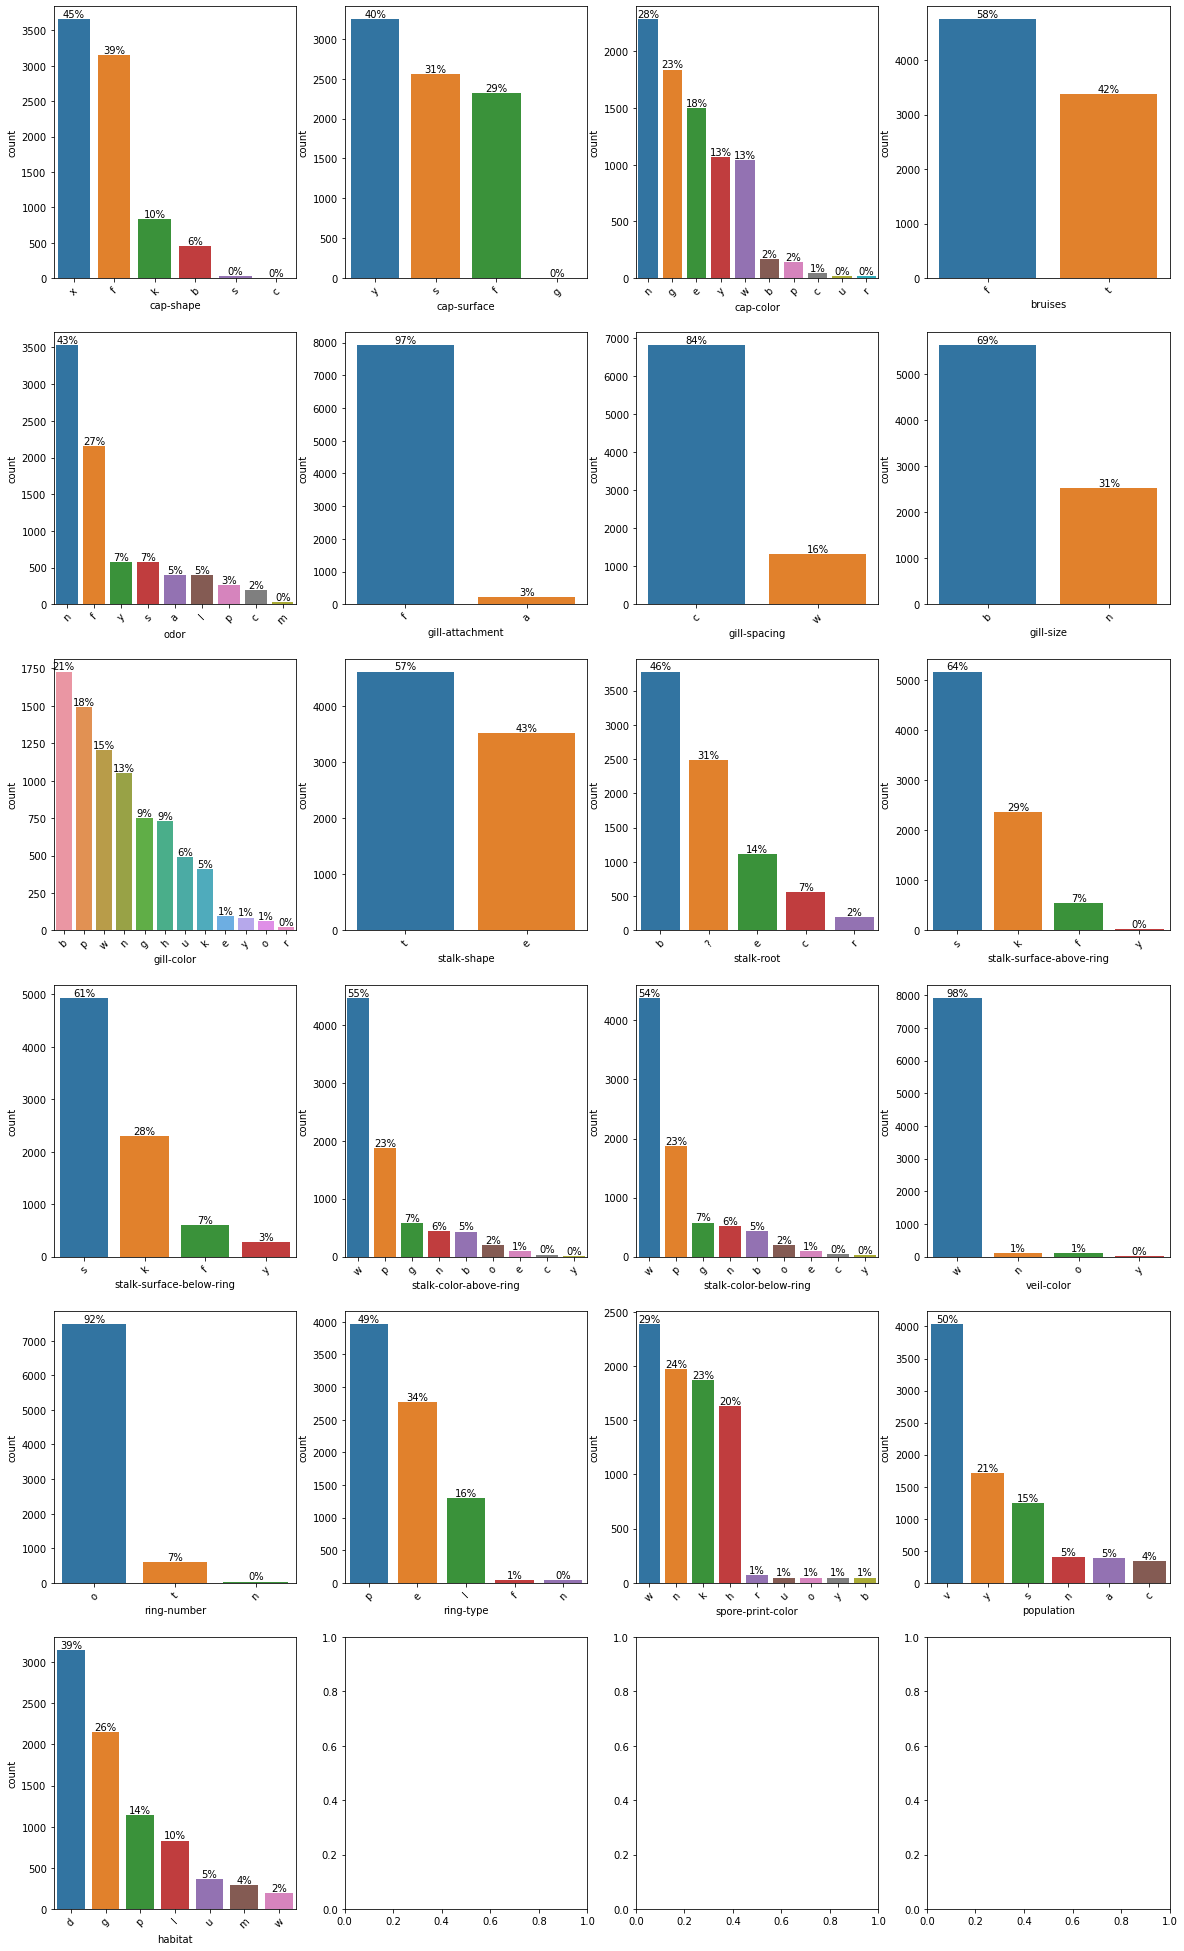

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, 4, figsize=(20, 35))
for colname, subplot in zip(selected_cols, ax.flatten()):
    x = sns.countplot(x=df[colname], ax=subplot, order = df[colname].value_counts().index)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
    lbls = df[colname].value_counts(ascending=False).values
    rel_percent = df[colname].value_counts(ascending=False, normalize=True).values*100
    x.bar_label(container=x.containers[0], labels=[f'{p:.0f}%' for p in rel_percent])

# Correlation Analysis for Feature Selection

Examining correlation between independent columns to check for any multi-collinearity issues within the dataset's independent variables

In [ ]:
from itertools import product
import scipy.stats as ss
import matplotlib.pyplot as plt

selected_cols_copy = selected_cols
selected_cols_prod = list(product(selected_cols,selected_cols_copy, repeat = 1))

result = []

for i in selected_cols_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df[i[0]], df[i[1]])))[1]))

print(result)

chi_test_output = pd.DataFrame(result, columns = ['selected_cols', 'selected_cols_copy', 'result'])

chi_test_output.pivot(index='selected_cols', columns='selected_cols_copy', values='result')

plt.figure(figsize=(10,7))

[('cap-shape', 'cap-surface', 4.635777687474702e-206), ('cap-shape', 'cap-color', 1.2499748358068987e-220), ('cap-shape', 'bruises', 1.8111194837838204e-112), ('cap-shape', 'odor', 0.0), ('cap-shape', 'gill-attachment', 3.1356456868889248e-40), ('cap-shape', 'gill-spacing', 1.8797723170778124e-10), ('cap-shape', 'gill-size', 5.169179218820523e-209), ('cap-shape', 'gill-color', 0.0), ('cap-shape', 'stalk-shape', 2.372578387125445e-163), ('cap-shape', 'stalk-root', 0.0), ('cap-shape', 'stalk-surface-above-ring', 2.3631468285329708e-123), ('cap-shape', 'stalk-surface-below-ring', 1.9111020867041806e-56), ('cap-shape', 'stalk-color-above-ring', 0.0), ('cap-shape', 'stalk-color-below-ring', 2.9282629191764433e-221), ('cap-shape', 'veil-color', 1.6617115877322068e-252), ('cap-shape', 'ring-number', 2.3316516518884903e-132), ('cap-shape', 'ring-type', 1.7930040205636269e-286), ('cap-shape', 'spore-print-color', 0.0), ('cap-shape', 'population', 0.0), ('cap-shape', 'habitat', 0.0), ('cap-surfa

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

Based on the above Chi-SQuare test results, we note that there are highly correlated pairs within the given dataset. There's a high need to drop the highly-correlated columns to ensure there's no multi-collinearity in the model. As these correlated columns explain the same type of variation in the target or dependent variable, selecting any one of the columns among these highly-correlated pairs instead of both of them becomes imperative for building a better model.

At first glance, we see that the "bruises" column being correlated with multiple columns including cap-color, cap-shape, cap-surface, gill-attachment, gill-size, gill-spacing, stalk-shape, veil-color. In order to ensure this relation is true, I performed pseudo-SelectKBest test with the bruises, odor, and cap-shape column to see if the method drops any one column among the bruises, cap-shape column or not.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
cpdf = df.copy()

cpdf["cap-shape_code"] = ord_enc.fit_transform(cpdf[["cap-shape"]])
cpdf["bruise_code"] = ord_enc.fit_transform(cpdf[["bruises"]])
cpdf["odor_code"] = ord_enc.fit_transform(cpdf[["odor"]])

X = cpdf[['cap-shape_code','odor_code','bruise_code']]
# print(X)

y = cpdf['class']
# print(y)

chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)
print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[6. 1.]
 [0. 1.]
 [3. 1.]
 ...
 [5. 0.]
 [8. 0.]
 [5. 0.]]
Original number of features: (8124, 3)
Reduced number of features: (8124, 2)


We clearly see that the cap-shape column has been removed from the SelectKBest outputs of the best features for explaining the variance in the class column

Based on the chi-square test pivot table results, I selected bruises, odor, habitat, stalk-root, stalk-shape, spore-print-color columns to perform further analysis of the best features for creating the classification model.

(8124, 3)
AxesSubplot(0.125,0.125;0.775x0.755)


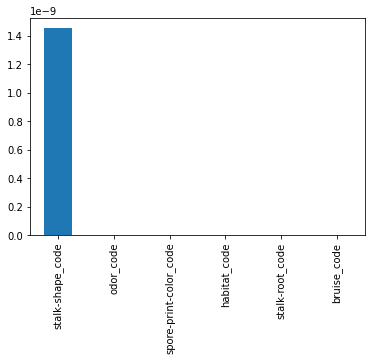

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

# Create new features if necessary
# cpdf["habitat_odor"] = cpdf["habitat"]+cpdf["odor"]
# cpdf["habitat_odor_code"] = ord_enc.fit_transform(cpdf[["habitat_odor"]])

cpdf["stalk-shape_code"] = ord_enc.fit_transform(cpdf[["stalk-shape"]])
cpdf["stalk-root_code"] = ord_enc.fit_transform(cpdf[["stalk-root"]])
cpdf["habitat_code"] = ord_enc.fit_transform(cpdf[["habitat"]])
cpdf["spore-print-color_code"] = ord_enc.fit_transform(cpdf[["spore-print-color"]])

X = cpdf[['odor_code','bruise_code', 'habitat_code', 'spore-print-color_code', 'stalk-root_code', 'stalk-shape_code']]
# print(X)

y = cpdf['class']
# print(y)

chi2_selector = SelectKBest(chi2, k=3)
X_kbest = chi2_selector.fit_transform(X, y)
# print(X_kbest)
print(X_kbest.shape)

chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

print(p_values.plot.bar())

# print('Original number of features:', X.shape)
# print('Reduced number of features:', X_kbest.shape)

# Classification Model Fitting

Creating multiple classifiers based on the final 4 columns. I have selected "Random Forest", "Gradient Boosting Machine", "Logistic Regression" classifiers to compare the results and decide on the classifier with the best fit.

Removed stalk-shape-code based on a high p-value. Dropping stalk-root-code column as well because of a few missing values. Missing values might indicate less possibility of collecting values for this attribute during data acquisition.

In [ ]:
dependent_varcodes = ['bruise_code', 'habitat_code', 'odor_code', 'spore-print-color_code']
independent_var = ['class']
selected_cols1 = dependent_varcodes +independent_var

train_data = cpdf[selected_cols1].sample(frac=0.8, random_state=23)
test_data = cpdf[selected_cols1].drop(train_data.index)

X_train = train_data[dependent_varcodes]
Y_train = train_data[independent_var]

X_test = test_data[dependent_varcodes]
Y_test = test_data[independent_var]

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#Create a Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100)

clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=23)

clf_log = LogisticRegression(random_state=1)

classifiers = [clf_rf, clf_gb, clf_log]

for classifier in classifiers:
  classifier.fit(X_train,Y_train.values.ravel())

y_pred_rf = clf_rf.predict(X_test)
y_pred_gb = clf_gb.predict(X_test)
y_pred_log = clf_log.predict(X_test)

Metrics calculations of the different classifiers created above

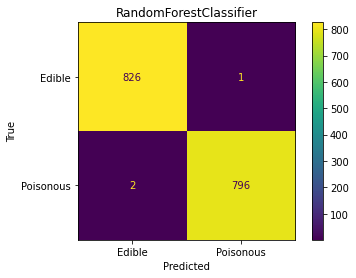

Accuracy of Random Forest Classifier:  99.8154%


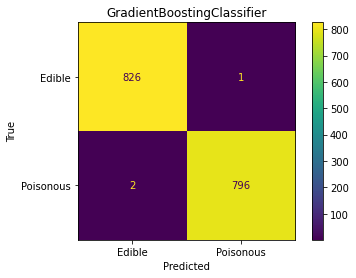

Accuracy of Gradient Boosting Classifier:  99.8154%


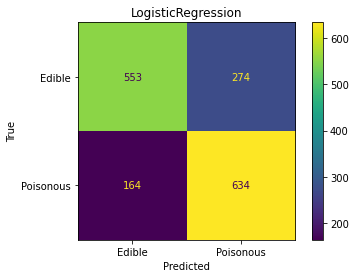

Accuracy of Logistic Regresion Classifier:  73.0462%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
conmat_rf = confusion_matrix(Y_test, y_pred_rf)
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conmat_rf, display_labels = clf_rf.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conmat_rf, display_labels = ['Edible','Poisonous'])
cm_display.plot()

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(type(clf_rf).__name__)
plt.show()
print("Accuracy of Random Forest Classifier: ", f'{accuracy_score(Y_test, y_pred_rf)*100:.4f}%')

conmat_gb = confusion_matrix(Y_test, y_pred_gb)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conmat_gb, display_labels = ['Edible','Poisonous'])
cm_display.plot()

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(type(clf_gb).__name__)
plt.show()
print("Accuracy of Gradient Boosting Classifier: ", f'{accuracy_score(Y_test, y_pred_gb)*100:.4f}%')

conmat_log = confusion_matrix(Y_test, y_pred_log)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conmat_log, display_labels = ['Edible','Poisonous'])
cm_display.plot()

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(type(clf_log).__name__)
plt.show()
print("Accuracy of Logistic Regresion Classifier: ", f'{accuracy_score(Y_test, y_pred_log)*100:.4f}%')

### **Based on the above metrics, we see that the Random Forest Classifier gives us the best results with no modifications to the default max_depth value. **